<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Helper-Classes" data-toc-modified-id="Helper-Classes-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Helper Classes</a></span></li><li><span><a href="#Question-1" data-toc-modified-id="Question-1-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Question 1</a></span><ul class="toc-item"><li><span><a href="#Importing-Data" data-toc-modified-id="Importing-Data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Importing Data</a></span><ul class="toc-item"><li><span><a href="#Constants" data-toc-modified-id="Constants-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Constants</a></span></li><li><span><a href="#Test-Data" data-toc-modified-id="Test-Data-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Test Data</a></span></li><li><span><a href="#Training-/-Validation-Data" data-toc-modified-id="Training-/-Validation-Data-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Training / Validation Data</a></span></li></ul></li><li><span><a href="#K-Nearest-Neighbours" data-toc-modified-id="K-Nearest-Neighbours-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>K Nearest Neighbours</a></span></li><li><span><a href="#Cross-Validation" data-toc-modified-id="Cross-Validation-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Cross Validation</a></span></li><li><span><a href="#Finding-the-Optimal-K" data-toc-modified-id="Finding-the-Optimal-K-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Finding the Optimal K</a></span></li><li><span><a href="#Sanity-Check" data-toc-modified-id="Sanity-Check-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Sanity Check</a></span></li><li><span><a href="#Accuracy-on-Test-Set-with-Optimal-K" data-toc-modified-id="Accuracy-on-Test-Set-with-Optimal-K-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Accuracy on Test Set with Optimal K</a></span></li></ul></li><li><span><a href="#Question-2" data-toc-modified-id="Question-2-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Question 2</a></span><ul class="toc-item"><li><span><a href="#Importing-Data" data-toc-modified-id="Importing-Data-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Importing Data</a></span><ul class="toc-item"><li><span><a href="#Constants" data-toc-modified-id="Constants-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Constants</a></span></li><li><span><a href="#Test-Data" data-toc-modified-id="Test-Data-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Test Data</a></span></li><li><span><a href="#Training-/-Validation-Data" data-toc-modified-id="Training-/-Validation-Data-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>Training / Validation Data</a></span></li></ul></li><li><span><a href="#Ridge-Regression" data-toc-modified-id="Ridge-Regression-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Ridge Regression</a></span></li><li><span><a href="#Cross-Validation" data-toc-modified-id="Cross-Validation-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Cross Validation</a></span></li><li><span><a href="#Finding-the-Optimal-Lambda" data-toc-modified-id="Finding-the-Optimal-Lambda-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Finding the Optimal Lambda</a></span></li><li><span><a href="#Sanity-Check" data-toc-modified-id="Sanity-Check-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Sanity Check</a></span></li><li><span><a href="#Loss-on-Test-Set-with-Optimal-Lambda" data-toc-modified-id="Loss-on-Test-Set-with-Optimal-Lambda-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Loss on Test Set with Optimal Lambda</a></span></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Summary</a></span></li></ul></div>

# Imports

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
from itertools import groupby
from operator import itemgetter
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
from numpy.linalg import norm
from abc import ABC, abstractmethod 

ImportError: cannot import name ABC

# Helper Classes

In [2]:
class DataFetcher:
    """
    DataFetcher: Grabs all csv data as pandas dataframes.
    """
    def __init__(self, directory, X_name, y_name):
        self.directory = directory
        self.X_name = X_name
        self.y_name = y_name
        
    def _get_training_X_path(self, subset_num):
        # 0 <= subset_num <= 9
        return './%s/train%s%d.csv' % (self.directory, self.X_name, (subset_num + 1))

    def _get_training_y_path(self, subset_num):
        # 0 <= subset_num <= 9
        return './%s/train%s%d.csv' % (self.directory, self.y_name, (subset_num + 1))

    def get_all_training_X_y(self):
        training_X_dfs = []
        training_y_dfs = []
        for i in range(NUM_SUBSETS):
            X_path = self._get_training_X_path(i)
            y_path = self._get_training_y_path(i)
            X_df = pd.read_csv(X_path, header=None)
            y_df =  pd.read_csv(y_path, header=None)
            training_X_dfs.append(X_df)
            training_y_dfs.append(y_df)
        
        return training_X_dfs, training_y_dfs
    
    def get_test_X_y(self):
        test_X_path = './%s/test%s.csv' % (self.directory, self.X_name)
        test_y_path = './%s/test%s.csv' % (self.directory, self.y_name)
        test_X_df = pd.read_csv(test_X_path, header=None)
        test_y_df = pd.read_csv(test_y_path, header=None)
        return test_X_df, test_y_df
    
class CrossValidationData:
    """
    CrossValidationData: Splits list of training dataframes 
        into validation & training dataframes.
    """
    def __init__(self, X_dfs, y_dfs):
        assert(len(X_dfs) == len(y_dfs))
        self.X = X_dfs
        self.y = y_dfs
        self.num_subsets = len(X_dfs)
        
    def _split_training_validation(self, dfs, subset_num):
        
        validation_df = dfs[subset_num]
        
        training_dfs = dfs[:subset_num] + dfs[subset_num+1:]
        training_df = pd.concat(training_dfs, ignore_index=True)
      
        return [training_df, validation_df]     
        
    def _get_training_validation_X(self, subset_num):
        assert(subset_num < self.num_subsets)
        
        [training_X, validation_X] = self._split_training_validation(self.X, subset_num)
        
        return [training_X, validation_X]
    
    def _get_training_validation_y(self, subset_num):
        assert(subset_num < self.num_subsets)
        
        [training_y, validation_y] = self._split_training_validation(self.y, subset_num)
        
        return [training_y, validation_y]
    
    def get_training_validation_X_y(self, subset_num):
        [training_X, validation_X] = self._get_training_validation_X(subset_num)
        [training_y, validation_y] = self._get_training_validation_y(subset_num)
        return [training_X, training_y, validation_X, validation_y]

    def get_all_X_y(self):
        training_X = pd.concat(self.X, ignore_index=True)
        training_y = pd.concat(self.y, ignore_index=True)
        return [training_X, training_y]
        
class Model(ABC):
    """
    Model -> Abstract base class for the models we will implement, namely 
            KNN and RidgeRegression.
    """
    def __init__(self, train_X, train_y):
        self.train_X = train_X
        self.train_y = train_y
    
    @abstractmethod
    def predict(self, x):
        pass
        
    def predict_df(self, X_df):
        predictions = X_df.apply(lambda row: self.predict(row), raw=True, axis=1)
        return predictions

# Question 1

## Importing Data

### Constants

In [3]:
KNN_DIR_NAME = 'knn-dataset'
KNN_X_NAME = 'Data'
KNN_Y_NAME = 'Labels'
NUM_SUBSETS = 10
MAX_NEIGHBOURS = 30

### Test Data

In [4]:
KNN_DataFetcher = DataFetcher(KNN_DIR_NAME, KNN_X_NAME, KNN_Y_NAME)
test_X, test_y = KNN_DataFetcher.get_test_X_y()

test_X.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0,0,0,1,13,10,0,0,0,8,...,16,0,0,0,4,0,14,0,15,0
1,0,0,0,0,0,7,0,0,0,0,...,16,0,0,0,0,0,2,11,12,0
2,16,11,5,16,15,16,16,16,16,16,...,14,16,16,16,16,16,16,16,16,0
3,0,0,7,16,2,2,0,0,0,1,...,11,0,0,0,0,9,9,0,0,0
4,0,0,0,7,0,0,0,0,0,0,...,0,0,0,0,0,13,14,12,0,0


In [5]:
test_y.head()

,0
0,6
1,6
2,5
3,6
4,6


### Training / Validation Data

In [6]:
training_X_dfs, training_y_dfs = KNN_DataFetcher.get_all_training_X_y()

KNN_CVData = CrossValidationData(training_X_dfs, training_y_dfs)

print("Training X shape: " + str(KNN_CVData.get_training_validation_X_y(0)[0].shape))

Training X shape: (900, 64)


In [7]:
print("Training y shape: " + str(KNN_CVData.get_training_validation_X_y(0)[1].shape))

Training y shape: (900, 1)


In [8]:
print("Validation X shape: " + str(KNN_CVData.get_training_validation_X_y(0)[2].shape))

Validation X shape: (100, 64)


In [9]:
print("Validation y shape: " + str(KNN_CVData.get_training_validation_X_y(0)[3].shape))

Validation y shape: (100, 1)


## K Nearest Neighbours

In [10]:
def get_majority_element(x):
    c = Counter(x)
    counts = c.most_common()
    grouped_counts = [list(group) for key, group in groupby(counts, itemgetter(1))]
    top_group = grouped_counts[0]
    
    # Let's break ties at random
    value, count = top_group[np.random.randint(len(top_group))]

    return value


class KNearestNeighbours(Model):
    
    def __init__(self, train_X, train_y, k):
        super().__init__(train_X, train_y)
        self.k = k
        
    def predict(self, x):
        # Get L2 Distances
        distances = norm(self.train_X.to_numpy() - x.T, axis=1)

        # Find K nearest neighbours
        closest = np.argsort(distances)[:self.k]
        
        # Get labels
        closest_labels = self.train_y.iloc[closest, :].values.flatten().tolist()
        
        # Get majority element
        majority_value = get_majority_element(closest_labels)

        return majority_value

def get_accuracy(true_labels, predicted_labels):
    assert(len(true_labels) == len(predicted_labels))
    return sum(1 for y, y_hat in zip(true_labels, predicted_labels) if y == y_hat ) / len(true_labels)

## Cross Validation

In [11]:
def perform_knn_CV():
    np.random.seed(42)
    
    average_accuracies = []
    for i in tqdm_notebook(range(MAX_NEIGHBOURS)):
        k = i + 1

        # Perform CV
        accuracies = []
        for j in range(NUM_SUBSETS):
            train_X, train_y, validation_X, validation_y = KNN_CVData.get_training_validation_X_y(j)
            
            # Create hypothesis
            model = KNearestNeighbours(train_X, train_y, k)
            predicted_validation_y = model.predict_df(validation_X)

            # Get accuracy
            accuracy = get_accuracy(validation_y.values.flatten(), predicted_validation_y.values.flatten())

            accuracies.append(accuracy)

        avg_accuracy = np.mean(accuracies)
        average_accuracies.append(avg_accuracy)

    return average_accuracies

## Finding the Optimal K

In [12]:
average_accuracies = perform_knn_CV()

HBox(children=(IntProgress(value=0, max=30), HTML(value='')))

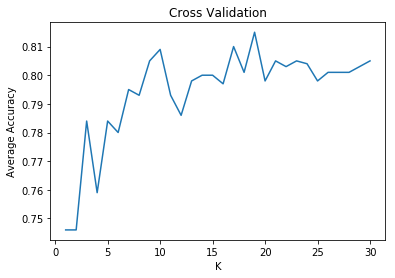

In [13]:
plt.plot(range(1, MAX_NEIGHBOURS + 1), average_accuracies)
plt.xlabel('K')
plt.ylabel('Average Accuracy')
plt.title('Cross Validation')
plt.show()

In [14]:
optimal_K = np.argsort(average_accuracies)[-1] + 1
print("The optimal K is %d with an accuracy of %f" % (optimal_K, max(average_accuracies)))

The optimal K is 19 with an accuracy of 0.815000


## Sanity Check

HBox(children=(IntProgress(value=0, max=30), HTML(value='')))

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



The optimal K found by sklearn is 19


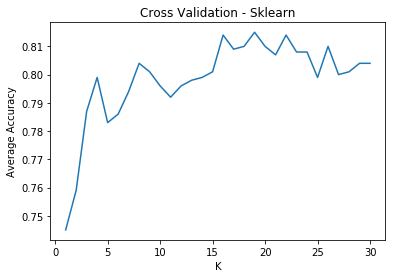

In [15]:
from sklearn.neighbors import KNeighborsClassifier

def perform_sklearn_knn_CV():
    np.random.seed(42)
    
    average_accuracies = []
    for i in tqdm_notebook(range(MAX_NEIGHBOURS)):
        k = i + 1

        # Perform CV
        accuracies = []
        for j in range(NUM_SUBSETS):
            train_X, train_y, validation_X, validation_y = KNN_CVData.get_training_validation_X_y(j)

            # Create hypothesis
            model = KNeighborsClassifier(n_neighbors=k, algorithm="brute")
            model.fit(train_X, train_y) 
            predicted_y = model.predict(validation_X)

            # Get accuracy
            accuracy = get_accuracy(validation_y.values.flatten(), predicted_y.flatten())
            accuracies.append(accuracy)

        avg_accuracy = np.mean(accuracies)
        average_accuracies.append(avg_accuracy)

    return average_accuracies

average_accuracies = perform_sklearn_knn_CV()
optimal_sklearn_K = np.argsort(average_accuracies)[-1] + 1
print("The optimal K found by sklearn is %d" % optimal_sklearn_K)
plt.plot(range(1, MAX_NEIGHBOURS + 1), average_accuracies)
plt.xlabel('K')
plt.ylabel('Average Accuracy')
plt.title('Cross Validation - Sklearn')
plt.show()

Sklearn agrees with our previous findings that the optimal K is 19.

This optimal K is determined by the algorithm in the slides that suggests we should pick the arg max parameter.

I would argue that in this case, some of the more simpler hypothesis (lower k) achieve comparable performance to k=19. We may be overfitting on the intricacies of the cross validation data. But we'll follow the algorithm given in class and continue with k=19.

## Accuracy on Test Set with Optimal K

In [16]:
training_X, training_y = KNN_CVData.get_all_X_y()

final_KNN_model = KNearestNeighbours(training_X, training_y, optimal_K)
predicted_test_y = final_KNN_model.predict_df(test_X)

test_accuracy = get_accuracy(test_y.values, predicted_test_y)
print("The accuracy on the test set is " + str(test_accuracy))

The accuracy on the test set is 0.7272727272727273


# Question 2

## Importing Data

### Constants

In [17]:
RR_DIR_NAME = 'regression-dataset'
RR_X_NAME = 'Input'
RR_Y_NAME = 'Target'
NUM_SUBSETS = 10
LAMBDAS = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
          1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9,
          2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 
          3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 
           4.0]

### Test Data

In [18]:
RR_DataFetcher = DataFetcher(RR_DIR_NAME, RR_X_NAME, RR_Y_NAME)
test_X, test_y = RR_DataFetcher.get_test_X_y()

test_X.head()

,0,1
0,-0.091029,0.319734
1,-0.186198,0.049163
2,0.125210,0.168324
3,0.132876,0.456690
4,0.271013,-0.074715


In [19]:
test_y.head()

,0
0,0.556061
1,0.808884
2,0.558628
3,-0.914613
4,-0.628796


### Training / Validation Data

In [20]:
training_X_dfs, training_y_dfs = RR_DataFetcher.get_all_training_X_y()

RR_CVData = CrossValidationData(training_X_dfs, training_y_dfs)

print("Training X shape: " + str(RR_CVData.get_training_validation_X_y(0)[0].shape))

Training X shape: (180, 2)


In [21]:
print("Training y shape: " + str(RR_CVData.get_training_validation_X_y(0)[1].shape))

Training y shape: (180, 1)


In [22]:
print("Validation X shape: " + str(RR_CVData.get_training_validation_X_y(0)[2].shape))

Validation X shape: (20, 2)


In [23]:
print("Validation y shape: " + str(RR_CVData.get_training_validation_X_y(0)[3].shape))

Validation y shape: (20, 1)


## Ridge Regression

In [24]:
class RidgeRegression(Model):

    def __init__(self, train_X, train_y, lmbda=0):
        super().__init__(train_X, train_y)
        X = train_X.to_numpy()
        y = train_y.to_numpy()

        # Add column of ones
        X = np.insert(X, 0, np.ones(len(X)), axis=1)

        self.lmbda = lmbda
        
        # Get inverse of A
        A = X.T.dot(X) + lmbda * np.identity(len(X.T))
        A_inv = np.linalg.inv(A)

        # Get b
        b = X.T.dot(y)

        # Get w
        w = A_inv.dot(b)

        self.w = w

    def predict(self, x):
        x = np.insert(x, 0, 1)
        y = np.dot(self.w.T, x)[0]
        return y

def get_mse_loss(true_values, predicted_values):
    assert(len(true_values) == len(predicted_values))
    l2_loss = np.mean(np.square(np.subtract(true_values,predicted_values)))
    return l2_loss

## Cross Validation

In [25]:
def perform_regression_CV():
    np.random.seed(42)
    
    average_losses = []
    for lmbda in tqdm_notebook(LAMBDAS):

        # Perform CV
        losses = []
        for j in range(NUM_SUBSETS):
            train_X, train_y, validation_X, validation_y = RR_CVData.get_training_validation_X_y(j)
            
            # Create hypothesis
            model = RidgeRegression(train_X, train_y, lmbda)
            predicted_validation_y = model.predict_df(validation_X)
            
            # Get accuracy
            loss = get_mse_loss(validation_y.values.flatten(), predicted_validation_y.values.flatten())
            losses.append(loss)
            
        avg_loss = np.mean(losses)
        average_losses.append(avg_loss)

    return average_losses

## Finding the Optimal Lambda

In [26]:
average_losses = perform_regression_CV()

HBox(children=(IntProgress(value=0, max=41), HTML(value='')))

In [27]:
optimal_lambda = LAMBDAS[np.argsort(average_losses)[0]]
print("The optimal lambda is %f with an average mse loss of %f" % (optimal_lambda, min(average_losses)))

The optimal lambda is 1.300000 with an average mse loss of 1.346067


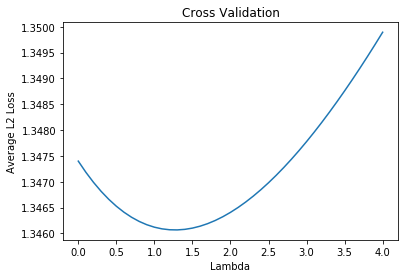

In [28]:
plt.plot(LAMBDAS, average_losses)
plt.xlabel('Lambda')
plt.ylabel('Average L2 Loss')
plt.title('Cross Validation')
plt.show()

The best lambda is 1.3. This minimizes the L2 loss the most from our range of lambdas.

## Sanity Check

HBox(children=(IntProgress(value=0, max=41), HTML(value='')))

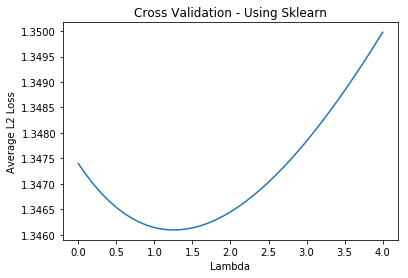

In [29]:
from sklearn.linear_model import Ridge

def perform_regression_CV_sklearn():
    np.random.seed(42)
    
    average_losses = []
    for lmbda in tqdm_notebook(LAMBDAS):

        # Perform CV
        losses = []
        for j in range(NUM_SUBSETS):
            train_X, train_y, validation_X, validation_y = RR_CVData.get_training_validation_X_y(j)

            # Create hypothesis
            clf = Ridge(alpha=lmbda, solver="cholesky", fit_intercept=True)
            clf.fit(train_X, train_y)
            predicted_y = clf.predict(validation_X)
            
            # Get l2 loss
            loss = get_mse_loss(validation_y.values.flatten(), predicted_y.flatten())
            losses.append(loss)
            
        avg_loss = np.mean(losses)
        average_losses.append(avg_loss)

    return average_losses

avg_losses = perform_regression_CV_sklearn()

plt.plot(LAMBDAS, avg_losses)
plt.xlabel('Lambda')
plt.ylabel('Average L2 Loss')
plt.title('Cross Validation - Using Sklearn')
plt.show()

Sklearn agrees with our findings. Let's create the model with our desired hyperparameters, trained on the entire train set & let's test it out on the test set.

## Loss on Test Set with Optimal Lambda

In [30]:
training_X, training_y = RR_CVData.get_all_X_y()

final_model = RidgeRegression(training_X, training_y, lmbda=optimal_lambda)
predicted_test_y = final_model.predict_df(test_X)

test_loss = get_mse_loss(test_y.values.flatten(), predicted_test_y)
print("The loss on the test set is " + str(test_loss))

The loss on the test set is 1.4361103474411636


# Summary

**K Nearest Neighbours**

The optimal K is 19 with an average accuracy of 0.815 during cross-validation, and a final test set accuracy of  0.727.

**Ridge Regression**

The optimal lambda is 1.3 with an average MSE loss of 1.346 during cross-validation, and a final test set MSE loss of 1.436.
